## Sales Analysis Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Combining all month's files into a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files :
    df = pd.read_csv("./Sales_Data/" + file) 
    all_months_data= pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False) 

#### Reading the combined file

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data Cleaning

In [4]:
nan_dataframe = all_data[all_data.isna().any(axis=1)]
nan_dataframe.head()
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or' ]

#### Adding a month column

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month' ] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding Sales done Column

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Ques. What was the best month for sales? and how much was earned that month?

In [8]:
solution = all_data.groupby('Month').sum()['Sales']

Text(0.5, 0, 'Months')

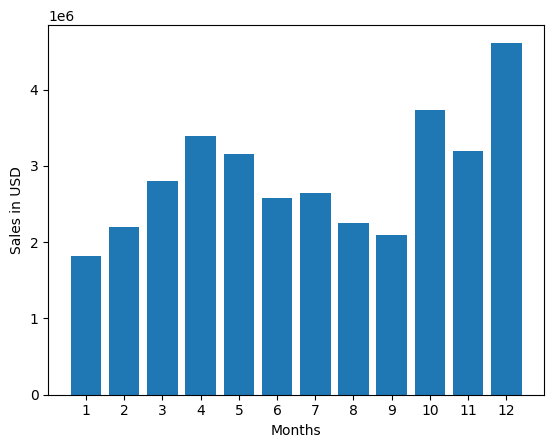

In [9]:
solution = all_data.groupby('Month').sum()['Sales']
months = range(1,13)

plt.bar(months, solution)
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Months")

#### Adding City Column

In [10]:
all_data['Address'] = all_data['Purchase Address'].astype(str)
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"333 8th St, Los Angeles, CA 90001",Los Angeles


#### Ques. Which City has most number of Sales?

In [11]:
solution2 = all_data.groupby('City').sum()['Sales']

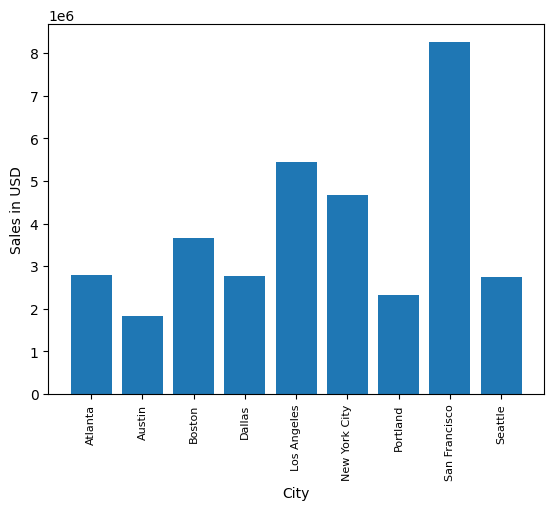

In [18]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, solution2)
plt.xticks(cities, rotation= 'vertical', size = 8)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

#### Ques. What time should we display ads to maximize likliehood of customer's buying product?

In [106]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])
all_data['Order time']= all_data['Order Date'].dt.hour
all_data.head()

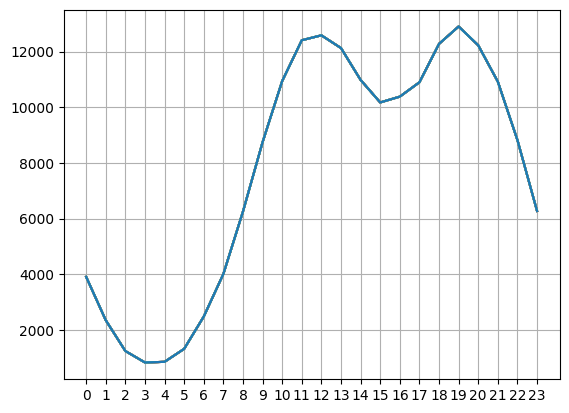

In [47]:
hours = [hour for hour, df in all_data.groupby('Order time')]

plt.plot(hours, all_data.groupby(['Order time']).count())
plt.xticks(hours)
plt.grid()
plt.show()

#### What products are most often sold together?

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Address,City,Order time,Order hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"917 1st St, Dallas, TX 75001",Dallas,8,2025-01-07 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"682 Chestnut St, Boston, MA 02215",Boston,22,2025-01-07 22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,2025-01-07 14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14,2025-01-07 14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"333 8th St, Los Angeles, CA 90001",Los Angeles,9,2025-01-07 09:27:00


In [99]:
df = pd.DataFrame(all_data[all_data['Order ID'].duplicated(keep=False)] )
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df= df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [75]:
from itertools import combinations 
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Ques. What Product Sold the most? Why you think it did?

In [109]:
most_sold_quantity = all_data['Quantity Ordered'].max()
print(most_sold_quantity)

9


In [111]:
most_sold_product = all_data[all_data['Quantity Ordered'] == 9]['Product']
print(most_sold_product)

81010    AAA Batteries (4-pack)
81646    AAA Batteries (4-pack)
92877    AAA Batteries (4-pack)
Name: Product, dtype: object
